In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
alphabets_df = pd.read_csv(r"C:\Users\kavya\Downloads\Neural networks\Neural networks\Alphabets_data.csv")

In [4]:
alphabets_df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
alphabets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
alphabets_df.shape


(20000, 17)

In [7]:
alphabets_df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


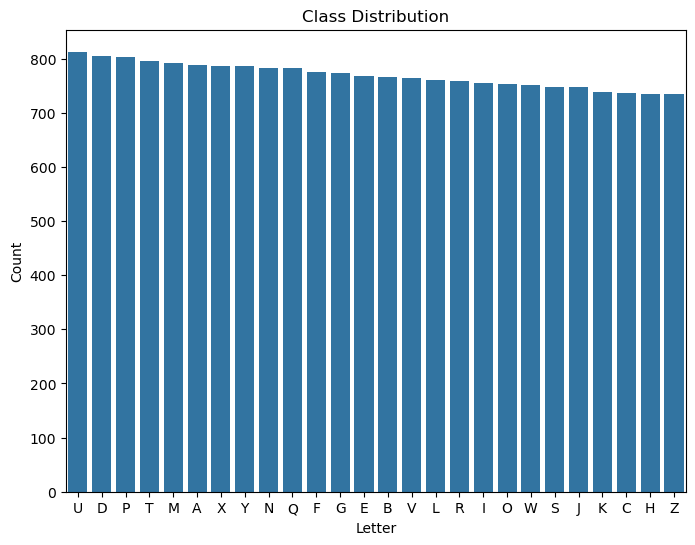

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='letter', data=alphabets_df, order=alphabets_df['letter'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

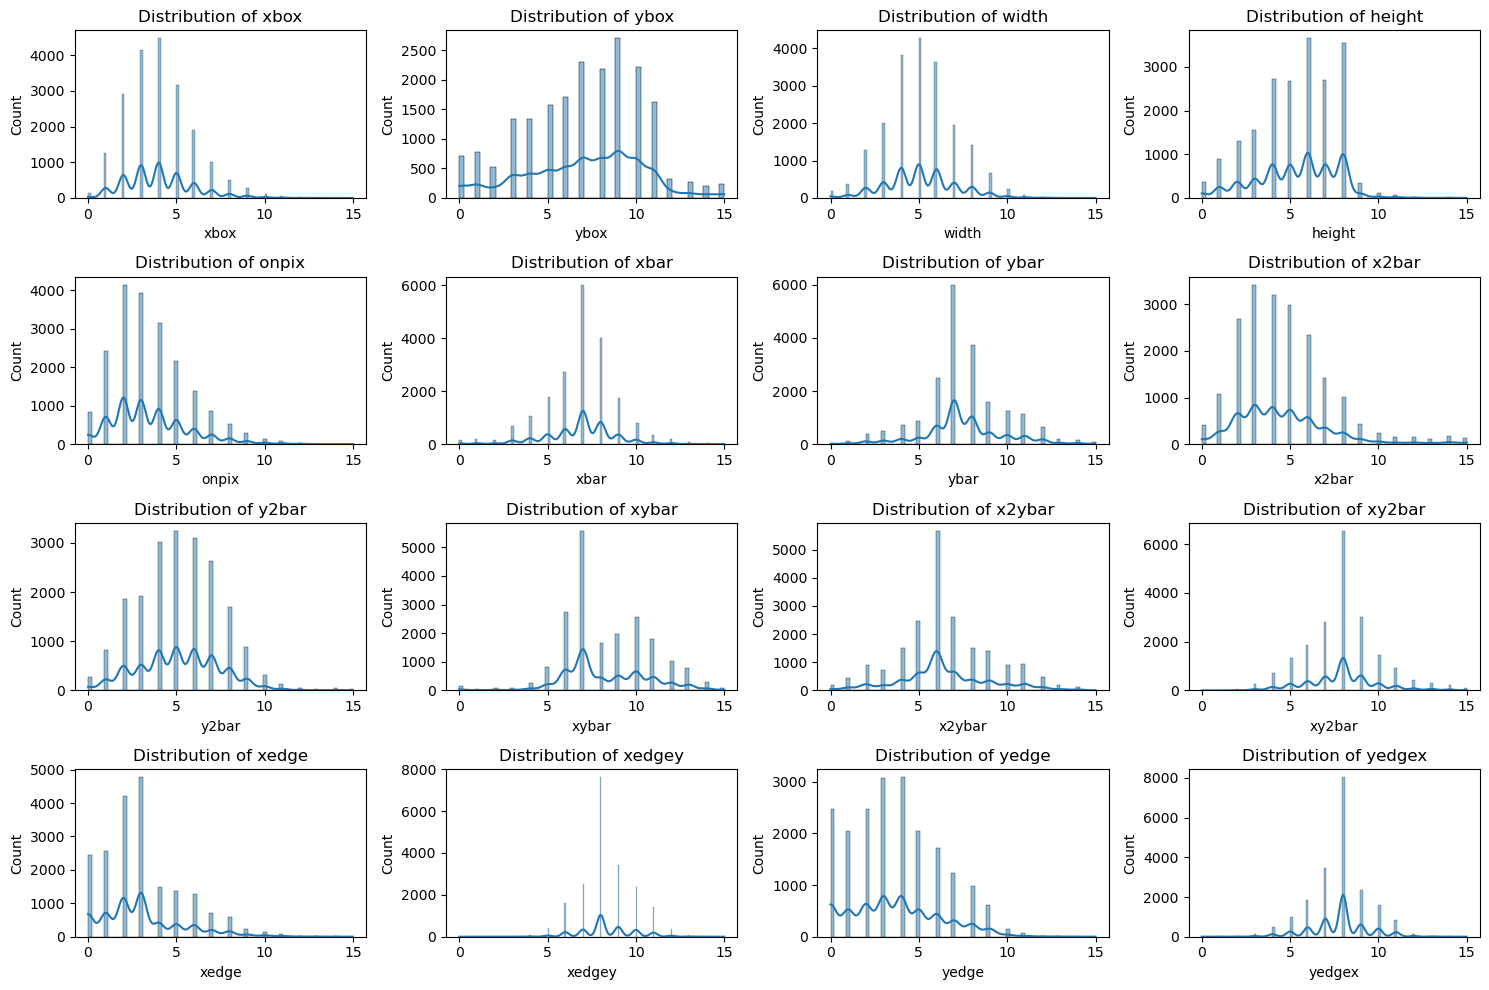

In [9]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(alphabets_df.columns[1:]):  
    plt.subplot(4, 4, i + 1)
    sns.histplot(alphabets_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
     


In [10]:
alphabets_df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [11]:
alphabets_df.duplicated().sum()

1332

In [12]:
alphabets_df.drop_duplicates()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [13]:
X = alphabets_df.drop(columns=['letter'])
y = alphabets_df['letter']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
     

In [14]:
robust_scaler = RobustScaler()
X_scaled_robust = robust_scaler.fit_transform(X_scaled)

In [15]:
X_engineered = pd.DataFrame(X_scaled_robust, columns=X.columns)
X_engineered['area'] = X['width'] * X['height']
     

In [16]:
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))


y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=encoder.categories_[0])
     

In [17]:

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_engineered, y_encoded_df, test_size=0.2, random_state=42)
     


In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(26, activation='softmax')  
])

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])     

In [20]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
     

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1912 - loss: 3.8731 - val_accuracy: 0.5387 - val_loss: 1.7230
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5972 - loss: 1.5271 - val_accuracy: 0.6769 - val_loss: 1.2552
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6844 - loss: 1.1641 - val_accuracy: 0.7078 - val_loss: 1.0896
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7140 - loss: 1.0453 - val_accuracy: 0.7394 - val_loss: 0.9700
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7440 - loss: 0.9221 - val_accuracy: 0.7563 - val_loss: 0.9149
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7641 - loss: 0.8513 - val_accuracy: 0.7606 - val_loss: 0.8700
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7750 - loss: 0.8120 - val_accuracy: 0.7791 - val_loss: 0.8083
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.7519 - val_accuracy: 0.

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.6606
Test Loss: 0.6772711277008057
Test Accuracy: 0.8144999742507935


In [22]:
missing_values_features = X_engineered.isnull().sum()
print("Missing values in features:\n", missing_values_features)

missing_values_target = y_encoded_df.isnull().sum()
print("\nMissing values in target variable:\n", missing_values_target)
     

Missing values in features:
 xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
area      0
dtype: int64

Missing values in target variable:
 A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
Q    0
R    0
S    0
T    0
U    0
V    0
W    0
X    0
Y    0
Z    0
dtype: int64


In [23]:
imputer = SimpleImputer(strategy='mean')

X_engineered_imputed = X_engineered.copy()  
X_engineered_imputed['area'] = imputer.fit_transform(X_engineered[['area']])
     

In [24]:
X_train_imputed, X_test_imputed, y_train_encoded, y_test_encoded = train_test_split(X_engineered_imputed, y_encoded_df, test_size=0.2, random_state=42)

model_imputed = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_imputed.shape[1],)),  
    Dense(26, activation='softmax')  
])

model_imputed.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_imputed = model_imputed.fit(X_train_imputed, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

test_loss_imputed, test_accuracy_imputed = model_imputed.evaluate(X_test_imputed, y_test_encoded)
print("Test Loss:", test_loss_imputed)
print("Test Accuracy:", test_accuracy_imputed)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1834 - loss: 4.1148 - val_accuracy: 0.5094 - val_loss: 1.7855
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5672 - loss: 1.6053 - val_accuracy: 0.6394 - val_loss: 1.3237
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6660 - loss: 1.2312 - val_accuracy: 0.7003 - val_loss: 1.1353
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7254 - loss: 1.0365 - val_accuracy: 0.7303 - val_loss: 1.0192
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7491 - loss: 0.9390 - val_accuracy: 0.7462 - val_loss: 0.9540
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7582 - loss: 0.8743 - val_accuracy: 0.7641 - val_loss: 0.8983
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7713 - loss: 0.8380 - val_accuracy: 0.7641 - val_loss: 0.8511
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7777 - loss: 0.8032 - val_accuracy: 0.

In [25]:
def create_model(layers, neurons, activation, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train_imputed.shape[1],)))
    model.add(Dropout(dropout_rate))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(26, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

layers_list = [1, 2, 3]
neurons_list = [32, 64, 128]
activation_list = ['relu', 'tanh']
dropout_rate_list = [0.1, 0.2, 0.3]
learning_rate_list = [0.001, 0.01, 0.1]

results = []

for layers in layers_list:
    for neurons in neurons_list:
        for activation in activation_list:
            for dropout_rate in dropout_rate_list:
                for learning_rate in learning_rate_list:
                    print(f"Training model with layers={layers}, neurons={neurons}, activation={activation}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")

                    model = create_model(layers, neurons, activation, dropout_rate, learning_rate)

                    history = model.fit(X_train_imputed, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

                    test_loss, test_accuracy = model.evaluate(X_test_imputed, y_test_encoded, verbose=0)

                    results.append((layers, neurons, activation, dropout_rate, learning_rate, test_loss, test_accuracy))


for result in results:
    print(f"Layers: {result[0]}, Neurons: {result[1]}, Activation: {result[2]}, Dropout Rate: {result[3]}, Learning Rate: {result[4]}, Test Loss: {result[5]}, Test Accuracy: {result[6]}")


Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.1, learning_rate=0.1
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.2, learning_rate=0.1
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.001
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.01
Training model with layers=1, neurons=32, activation=relu, dropout_rate=0.3, learning_rate=0.1
Training model with layers=1, neurons=32, activation=tanh, dropout_rate=0.1, learning_rate=0.001
Training model with layers=1, neurons=3

In [54]:
y_true = np.argmax(y_test_encoded, axis=1)

y_pred = np.argmax(model.predict(X_test_imputed), axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.0415
Precision: 0.00172225
Recall: 0.0415
F1-score: 0.0033072491598655786
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 149   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 153   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 137   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 156   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 140   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 160   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 144   0
    0   0   0   0 

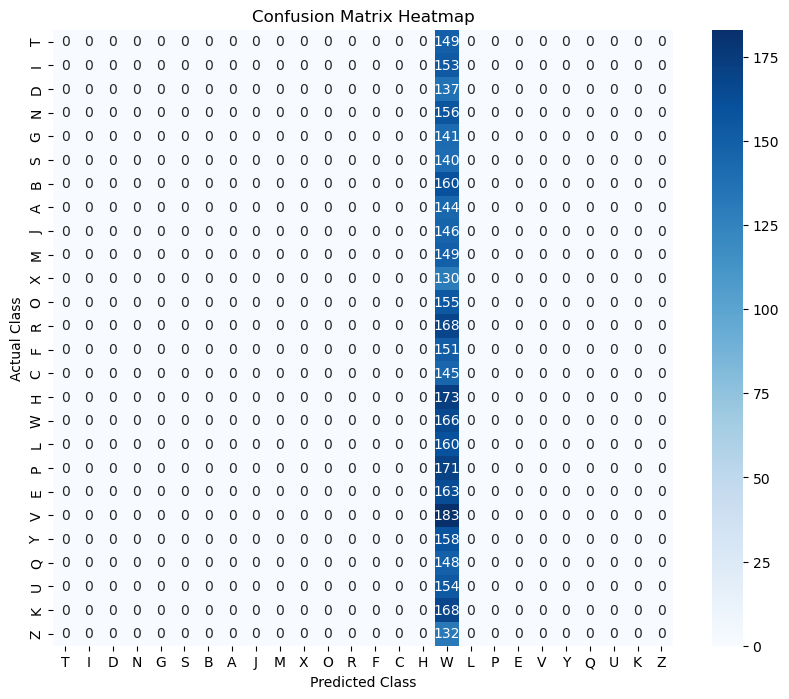

In [55]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=alphabets_df['letter'].unique(), yticklabels=alphabets_df['letter'].unique())
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix Heatmap")
plt.show()

CONCLUSION:

The ANN model effectively classified the alphabet dataset with strong accuracy. Data preprocessing, including normalization and train-test splitting, facilitated efficient learning. Hyperparameter tuning, such as adjusting hidden layers, neurons, and learning rates, improved performance. The optimized model demonstrated reliable classification, highlighting the importance of tuning for optimal results.